In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('../artifacts/sentiment_analysis.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


##Data Preprocessing

In [4]:
data.shape

(7920, 3)

In [5]:
data.duplicated().sum()

0

In [6]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

###Text Preprocessing

In [7]:
import re
import string

In [8]:
data['tweet'].head()

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

convert uppercase to lowercase

In [9]:
data['tweet']=data['tweet'].apply(lambda x:" ".join(x.lower() for x in x.split()))

In [10]:
data['tweet'].head()

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

remove links

In [11]:
data['tweet']=data['tweet'].apply(lambda x:" ".join(re.sub(r'^https?:\/\/.*[\r\n]*','',x,flags=re.MULTILINE) for x in x.split()))

In [12]:
data['tweet'].head()

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [13]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text=text.replace(punctuation,'')
    return text

data['tweet']=data['tweet'].apply(remove_punctuations)

In [15]:
data['tweet'].tail()

7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

remove numbers

In [16]:
data['tweet']=data['tweet'].str.replace('\d+','',regex=True)

In [17]:
data['tweet'].tail()

7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

remove stopwords

In [18]:
!pip install nltk


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import nltk

In [20]:
nltk.download('stopwords',download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [21]:
with open('../static/model/corpora/stopwords/english','r') as file:
    sw=file.read().splitlines()

In [22]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
data['tweet']=data['tweet'].apply(lambda x:" ".join(x for x in x.split() if x not in sw))

In [24]:
data['tweet'].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

stemming

In [25]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [26]:
data["tweet"]=data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [27]:
data['tweet'].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [28]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


###Building Vocabulary

In [29]:
from collections import Counter
vocab=Counter()

In [30]:
vocab

Counter()

In [31]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [32]:
len(vocab)

15949

In [33]:
data.shape

(7920, 3)

In [34]:
tokens=[key for key in vocab if vocab[key]>10]

In [35]:
len(tokens)

1145

In [36]:
def save_vocabulary(lines,filename):
    data='\n'.join(lines)
    file=open(filename,'w',encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens,'../static/model/vocabulary.txt')

###Divide dataset

In [37]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


In [38]:
x=data['tweet']
y=data['label']

In [39]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [41]:
x_train

869         mb appl updat current th minut seem detroy pc
4234             dear appl first iphon ipod what next mac
5751    thank koodo make miss warm yousuck peiceof shi...
4950    josh duggar offer televised… news photographi ...
3501        new case babi samsung phone red orang im girl
                              ...                        
3449    eboni coffe tabl final coat ridgid ryobi trout...
1042    itunessupport numer email hour long phone call...
3618    happi fuck disney disneyland magic fun portrai...
3358    final got new soni inch lcd mount time end ste...
1133    gether togeth ever orafewmonth whaev notgonhap...
Name: tweet, Length: 6336, dtype: object

In [42]:
x_test

1136    soft sweet crisp red appl vegan vegan gold veg...
5880    announc appl bourbon bacon jam hand saturday h...
5205    new hack byp iphon passcod access photo messag...
2006    great day hockey let go penguin bruin sky appl...
7308    amaz night klaverfabrikken amaz beauti copenha...
                              ...                        
4060    michel came home tcot nascar theater movi sing...
282                      hour usag phone thank iphon appl
826     gonna buy th charger iphon havent even year ip...
6694    news tv new ordinateur newstv tv samsung newrd...
3555    hey appl beatssuck music jock suck mistak inn ...
Name: tweet, Length: 1584, dtype: object

In [43]:
y_test

1136    0
5880    0
5205    0
2006    0
7308    0
       ..
4060    0
282     1
826     1
6694    0
3555    0
Name: label, Length: 1584, dtype: int64

###Vectorization

In [44]:
def vectorizer(ds,vocabulary):
    vectorized_lst=[]

    for sentence in ds:
        sentence_lst=np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i]=1

        vectorized_lst.append(sentence_lst)

    vectorized_lst_new=np.asarray(vectorized_lst,dtype=np.float32)

    return vectorized_lst_new

In [45]:
vectorized_x_train=vectorizer(x_train,tokens)

In [46]:
vectorized_x_test=vectorizer(x_test,tokens)

In [47]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [48]:
y_train

869     1
4234    1
5751    1
4950    0
3501    0
       ..
3449    0
1042    1
3618    0
3358    0
1133    0
Name: label, Length: 6336, dtype: int64

In [49]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [50]:
y_test

1136    0
5880    0
5205    0
2006    0
7308    0
       ..
4060    0
282     1
826     1
6694    0
3555    0
Name: label, Length: 1584, dtype: int64

In [51]:
y_train.value_counts()

label
0    4711
1    1625
Name: count, dtype: int64

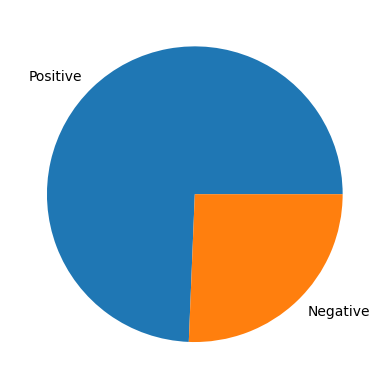

In [52]:
plt.pie(np.array([y_train.value_counts()[0],y_train.value_counts()[1]]),labels=['Positive','Negative'])
plt.show()

###Handle imbalanced dataset

In [53]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
vectorized_x_train_smote,y_train_smote=smote.fit_resample(vectorized_x_train,y_train)
print(vectorized_x_train_smote.shape,y_train_smote.shape)

(9422, 1145) (9422,)


In [55]:
y_train_smote.value_counts()

label
1    4711
0    4711
Name: count, dtype: int64

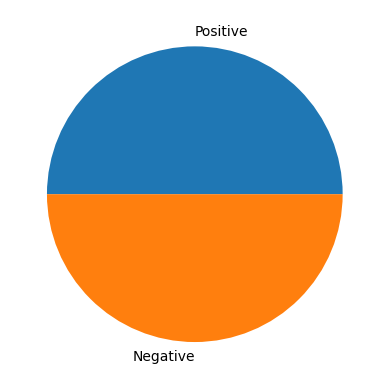

In [56]:
plt.pie(np.array([y_train_smote.value_counts()[0],y_train_smote.value_counts()[1]]),labels=['Positive','Negative'])
plt.show()

In [57]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [58]:
y_train_smote

0       1
1       1
2       1
3       0
4       0
       ..
9417    1
9418    1
9419    1
9420    1
9421    1
Name: label, Length: 9422, dtype: int64

In [59]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [60]:
y_test

1136    0
5880    0
5205    0
2006    0
7308    0
       ..
4060    0
282     1
826     1
6694    0
3555    0
Name: label, Length: 1584, dtype: int64

##Model Training and Evaluation

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [63]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

def training_scores(y_act,y_pred):
    acc=round(accuracy_score(y_act,y_pred),3)
    pr=round(precision_score(y_act,y_pred),3)
    rec=round(recall_score(y_act,y_pred),3)
    f1=round(f1_score(y_act,y_pred),3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

def validation_scores(y_act,y_pred):
    acc=round(accuracy_score(y_act,y_pred),3)
    pr=round(precision_score(y_act,y_pred),3)
    rec=round(recall_score(y_act,y_pred),3)
    f1=round(f1_score(y_act,y_pred),3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

###Logistic Regression

In [75]:
lr=LogisticRegression()
lr.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred=lr.predict(vectorized_x_train_smote)
y_test_pred=lr.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)
validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 0.939
	Precision = 0.915
	Recall = 0.968
	F1-Score = 0.941
Testing Scores:
	Accuracy = 0.874
	Precision = 0.714
	Recall = 0.835
	F1-Score = 0.77


###Naive Bayes

In [76]:
mnb=MultinomialNB()
mnb.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred=mnb.predict(vectorized_x_train_smote)
y_test_pred=mnb.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)
validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 0.906
	Precision = 0.869
	Recall = 0.956
	F1-Score = 0.911
Testing Scores:
	Accuracy = 0.867
	Precision = 0.679
	Recall = 0.905
	F1-Score = 0.776


###Decision Tree

In [83]:
dt=DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred=dt.predict(vectorized_x_train_smote)
y_test_pred=dt.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)
validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.835
	Precision = 0.678
	Recall = 0.661
	F1-Score = 0.669


###Random Forest

In [82]:
rf=RandomForestClassifier()
rf.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred=rf.predict(vectorized_x_train_smote)
y_test_pred=rf.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)
validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.867
	Precision = 0.757
	Recall = 0.698
	F1-Score = 0.726


###Support Vector Machine

In [81]:
svm=SVC()
svm.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred=svm.predict(vectorized_x_train_smote)
y_test_pred=svm.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)
validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 0.979
	Precision = 0.962
	Recall = 0.998
	F1-Score = 0.98
Testing Scores:
	Accuracy = 0.883
	Precision = 0.754
	Recall = 0.8
	F1-Score = 0.776


In [85]:
import pickle

with open('../static/model/model.pickle','wb') as file:
    pickle.dump(lr,file)